# Univariate Time series Forecasting

In [1]:
# import required libraries

import numpy as np
import pandas as pd


In [2]:
# Importing the data
data = pd.read_csv("../data/daily_temp.csv")
data.head()

,Date,Temp
0,1981-01-01,20.7
1,1981-01-02,17.9
2,1981-01-03,18.8
3,1981-01-04,14.6
4,1981-01-05,15.8


In [3]:
# Get the information about data
data.shape

(3650, 2)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3650 entries, 0 to 3649
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    3650 non-null   object 
 1   Temp    3650 non-null   float64
dtypes: float64(1), object(1)
memory usage: 57.2+ KB


In [5]:
data.describe()

,Temp
count,3650.000000
mean,11.177753
std,4.071837
min,0.000000
25%,8.300000
50%,11.000000
75%,14.000000
max,26.300000


<Axes: >

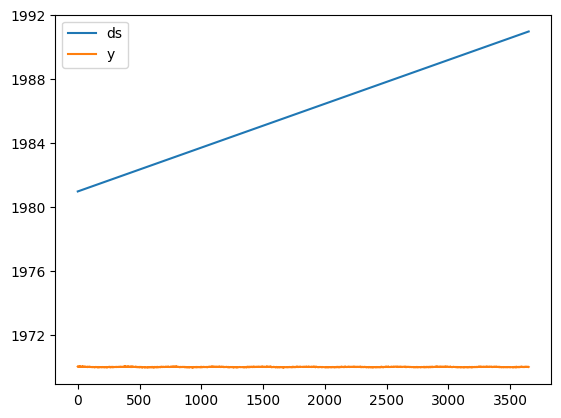

In [13]:
data.plot()

In [10]:
# fit prophet model on the car sales dataset
from prophet import Prophet

# prepare excepted column names
data.columns = ['ds', 'y']
data["ds"] = pd.to_datetime(data["ds"])

# define the model
model = Prophet()

# Fit the model
model.fit(data)

14:05:10 - cmdstanpy - INFO - Chain [1] start processing
14:05:11 - cmdstanpy - INFO - Chain [1] done processing


/home/codespace/.python/current/lib/python3.10/site-packages/prophet/plot.py:71: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
/home/codespace/.python/current/lib/python3.10/site-packages/prophet/plot.py:72: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  ax.plot(m.history['ds'].dt.to_pydatetime(), m.history['y'], 'k.',


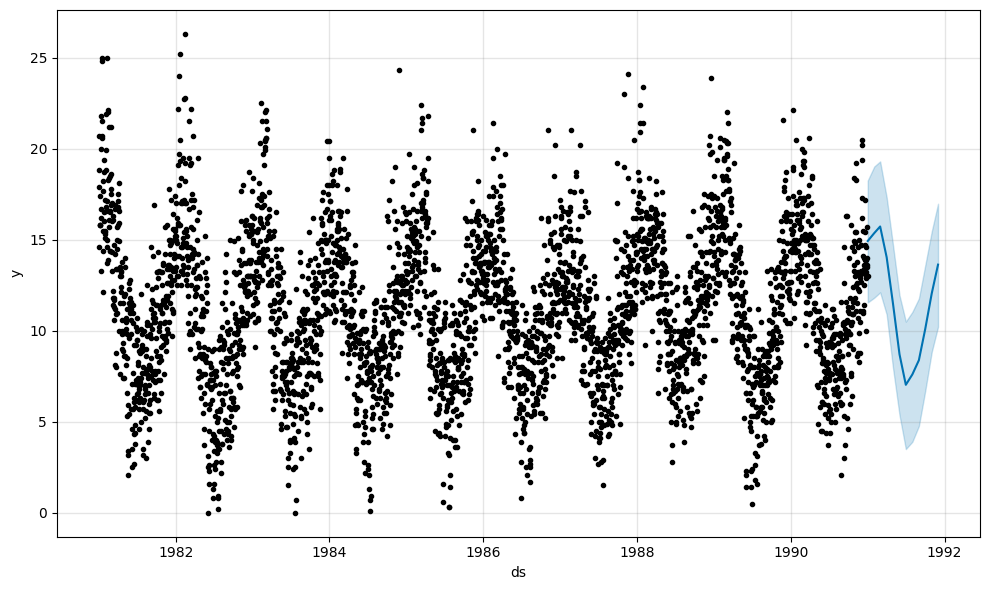

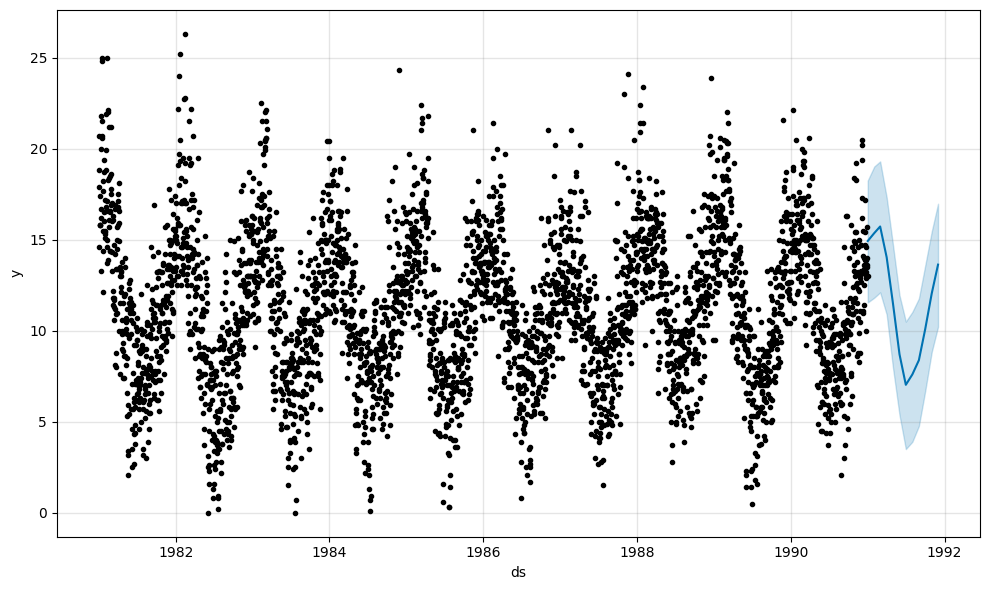

In [16]:
# define the period for which we want a prediction
future = list()
for i in range(1, 13):
 date = '1991-%02d' % i
 future.append([date])
future = pd.DataFrame(future)
future.columns = ['ds']
future['ds']= pd.to_datetime(future['ds'])
# use the model to make a forecast
forecast = model.predict(future)
# summarize the forecast
# print(forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].head())
# plot forecast
model.plot(forecast)